In [1]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 로드
(x_train, y_train),(x_test, y_test) = mnist.load_data()

#로드된 데이터셋 확인
print("train set:", x_train.shape, y_train.shape)
print("test set:", x_test.shape, y_test.shape)

#데이터 정규화  max는 255
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


In [2]:
"""
초기값 설정
레이어의 초기화 방법을 다르게 설정할 수 있다. Dense 레이어는 기본 초기화 방법으로 Glorot
Uniform 초기화 방법이 설정되어 있다
"""
dense = tf.keras.layers.Dense(256, activation="relu")
dense.get_config()["kernel_initializer"]

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

In [3]:
"""
기본값으로 설정된 GlorotUniform 초기화 방법을 HeNormal로 변경하기 위해서는 kernel_initializer 매개변수에 설정하면 된다
옵티마이저, 손실함수와 마찬가지로 문자열로 지정하는 방법과 클래스 인스턴스로 지정하는 방법이 있다
"""
#문자열 초기화 
dense = tf.keras.layers.Dense(256, kernel_initializer="he_normal", activation="relu")
print(dense.get_config()["kernel_initializer"])

#클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation="relu")
print(dense.get_config()["kernel_initializer"])

{'class_name': 'HeNormal', 'config': {'seed': None}}
{'class_name': 'HeNormal', 'config': {'seed': None}}


In [4]:
"""
###규제
모델의 과대적합을 해소하기 위해 L1, L2 규제를 적용하기도 한다. 텐서플로 케라스 레이어는 기본값으로 규제를 적용하지 않고 있다.
다음 코드에서 kernel_regularizer 설정이 Npne으로 설정되어 있는것을 확인할 수 있다
따라서 레이어에 규제를 적용하기 위해서는 별도로 설정해 주어야 한다
"""

# 기본값
dense = tf.keras.layers.Dense(256, activation="relu")
dense.get_config()

{'name': 'dense_3',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [5]:
"""
모델이 과대적합하는 것을 방지해 주기 위해 모델을 구성하는 레이어마다 규제를 적용할 수 있다.
케라스에서 지원하는 규제는 L1, L2 규제가 있다. 규제를 적용하기 위해서는 kernel_regularizer에 규제를 지정하면 된다
"""
#L! 규제 적용
dense = tf.keras.layers.Dense(256, kernel_regularizer="l1", activation="relu")
print(dense.get_config()["kernel_regularizer"])

# 클래스 인스턴스 적용, alpha=0.1 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation="relu")
print(dense.get_config()["kernel_regularizer"])

{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}
{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


In [6]:
"""
###드롭아웃
드롭아웃은 2014년에 발표된 Dropout : 논문에서 제안된 아이디어이며 무려 26000번 이상 넘게 인용된 논문이다
딥러닝 모델의 가장 큰 난제가 바로 과대적합 문제다
딥러닝 모델의 층이 넓고 깊어질 때 (wide-and-deep)모델은 훈련에 주어진 샘플에 과하게 
적합하도록 학습하는 경향이 있다
따라서 훈련할때 만나지 못한 새로운 데이터에 대해서는 좋지 않는 예측력을 보일 때가 많다
즉, 훈련 데이터셋에 너무 적응하여 검증 데이터셋이나 테스트 데이터셋에 대해 일반화된 성능을 
갖지 못하는 문제가 자주 발생하는 편이다
드롭아웃은 모델의 과대적합 문제를 해결하기 위해 제안된 아이디어이며, 실무적으로 상당히 좋은 
효과를 보이는 것으로 알려져 있다

- 중요한 점은 모델이 훈련할 때는 드롭아웃이 적용되어 노드 중 일부만 훈련하게 되지만, 
예측 시점에는 모든 노드들이 활용한다
"""

# Dropout 25% 비율 적용(25%의 노드가 삭제)
tf.keras.layers.Dropout(0.25)

In [7]:
"""
# 배치 정규화

배치 정규화는 각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일을 정규화 한다
다음 층으로 데이터가 전달되기 전에 스케일을 조정하기 때문에 보다 안정적인 훈련이 가능하고
성능을 크게 향상 시킬수 있다

배치 정규화 층은 케라스에서 클래스 함수로 지원하기 때문에 별도로 코드를 구현할 필요가 없고,
클래스 인스턴스를 생성하여 추가해주면 된다

다음 코드에서는 Dense 레이어에 ReLU 활성화 함수를 추가한 모델을 model_a 로 지정하여 생성하고,
배치 정규화를 적용 후 ReLU 활성화 함수를 추가한 모델을 model_b에 지정하여 성능 비교를 해본다
"""
#Model A: Dense + ReLU
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])
model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [8]:
#model B: Dense + BatchNorm + ReLU
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    
    tf.keras.layers.Dense(64),
    #배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation("relu"),
    
    tf.keras.layers.Dense(32),
    #배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #베치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation("relu"),
    
    tf.keras.layers.Dense(10, activation="softmax"),
])
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

In [9]:
"""
#활성화 함수

Dense 레이어에 ReLU활성화 함수를 지정했다
케라스가 지원하는 다른 활성화 함수를 적용해 볼 수 있다
활성화 함수를 적용할 때, 다음과 같이 클래스 인스턴스로 선언하여 하이퍼파라미터 값을 변경하여 적용할 수 있다

"""
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha=0.2.로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [10]:
#LeakyReLU를 모델에 적용할 때는 다음과 같이 적용할 수 있다
# Model C: Dense + BatchNorm + LeakyReLU(0.2)
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(64),
    #배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #LeakyReLU , alpha =0.2 적용
    tf.keras.layers.LeakyReLU(alpha =0.2),
    
    tf.keras.layers.Dense(32),
    #배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),
    
    tf.keras.layers.Dense(10, activation="softmax"),
    
])

model_c.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                      

In [11]:
"""
model_a : Dense 레이어 + ReLU 활성화 함수
model_b : Dense 레이어 + 배치 정규화
model_c : Dense 레이어 + 배치 정규화 + LeakyReLU(0.2) 활성화 함수

아 놀라운건 loss 함수에 오타가 생겼는데 , 막상 실행하니 평소알던 다른 에러가 뜸
이걸 그래픽카드 램 부족이라 생각했는데 - 알고보니 loss 함수에 오타가 났던거임
의외다
"""

model_a.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model_b.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model_c.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

#Model A: Dense+ReLU
history_a =model_a.fit(x_train, y_train,
                      validation_data = (x_test, y_test),
                      epochs=10)

#Model B: Dense+ReLU
history_b =model_b.fit(x_train, y_train,
                      validation_data = (x_test, y_test),
                      epochs=10)

#Model C: Dense+ReLU
history_c =model_c.fit(x_train, y_train,
                      validation_data = (x_test, y_test),
                      epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2849 - accuracy: 0.9182 - val_loss: 0.1482 - val_accuracy: 0.9571
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1252 - accuracy: 0.9631 - val_loss: 0.1119 - val_accuracy: 0.9653
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0914 - accuracy: 0.9730 - val_loss: 0.1040 - val_accuracy: 0.9678
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0732 - accuracy: 0.9773 - val_loss: 0.0906 - val_accuracy: 0.9731
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0615 - accuracy: 0.9814 - val_loss: 0.0888 - val_accuracy: 0.9725
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0498 - accuracy: 0.9841 - val_loss: 0.0985 - val_accuracy: 0.9705
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0455 - accuracy: 0.9858 - val_loss: 0.0904 - val_accuracy:

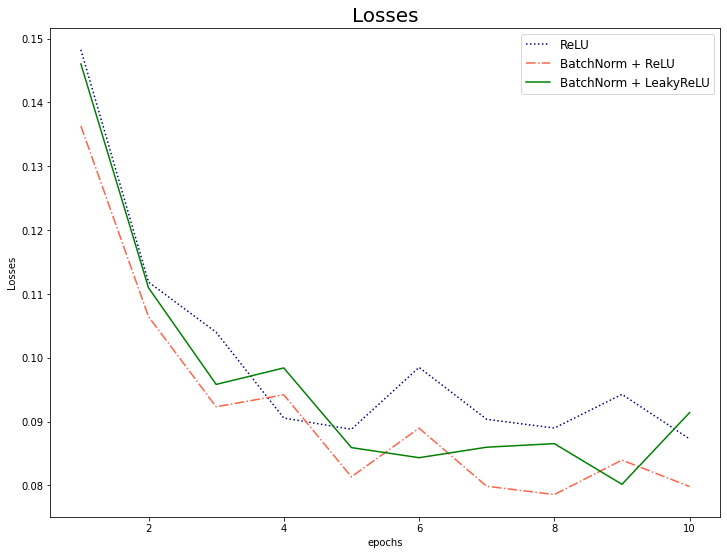

In [13]:
import matplotlib.pyplot as plt 
import numpy as np
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 11), history_a.history["val_loss"], color ="navy", linestyle=":")
plt.plot(np.arange(1, 11), history_b.history["val_loss"], color ="tomato", linestyle="-.")
plt.plot(np.arange(1, 11), history_c.history["val_loss"], color ="green", linestyle="-")

plt.title("Losses", fontsize=20)
plt.xlabel("epochs")
plt.ylabel("Losses")
plt.legend(["ReLU", "BatchNorm + ReLU", "BatchNorm + LeakyReLU"], fontsize =12)
plt.show()